In [1]:
from IPython.core.display import HTML


In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [5]:
import os
os.chdir('build/')
from runner_utils import *
from globals import *
from stats_utils import *
import matplotlib.pyplot as plt
%matplotlib inline 



In [6]:
%load_ext autoreload
%autoreload 2

In [7]:

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.style.use('seaborn-ticks')

In [8]:
def run_and_plot(shockflag, factor = 0.5, shocklength=3):
    t_start = 2000
    param_names = ['shockflag', 'factor','t_start', 't_end', 'policy_start', 'policy_end', 'gpolicy', 'ptol', 'helico']
    param_values = [shockflag, factor, t_start, t_start+shocklength, t_start, t_start+shocklength, 0, 1.25, 0]
    param_dict = dict(zip(param_names, param_values))
    
    print("Running vanilla shock")
    res_vanilla = run_and_read(list(param_dict.keys()), list(param_dict.values()))
    type_crisis(res_vanilla, t_start)
   
    
    print("With naive policy")
    param_dict['shockflag'] = shockflag+3
    res_naive = run_and_read(list(param_dict.keys()), list(param_dict.values()))
    type_crisis(res_naive, t_start)
  
    print("With Naive Policy + Helico")
    param_dict['shockflag'] = shockflag+3
    param_dict['helico'] = 1
    res_helico = run_and_read(list(param_dict.keys()), list(param_dict.values()))
    type_crisis(res_helico, t_start)

    
    print("With adaptive policy")
    param_dict['shockflag'] = shockflag + 3
    param_dict['helico'] = 0
    param_dict['gpolicy'] = 1
    res_adapt = run_and_read(list(param_dict.keys()), list(param_dict.values()))
    type_crisis(res_adapt, t_start)
    
    return res_vanilla, res_naive, res_helico, res_adapt
    

In [9]:
def plot_distributions(prices_data, wages_data, title):
    nrows = 2
    ncols = 7
    f, ax = plt.subplots(nrows = nrows, ncols = ncols, dpi=200, figsize=(12.5,5), )

    indices = [2, int(shocklength/2)+2, shocklength +2, shocklength+3, shocklength +5,-2, -1]
    titles = [ 0, int(shocklength/2), shocklength, shocklength+1, shocklength +3, 50, 100]

    for i in range(ncols):
        p = ax[0,i].hist(prices_data[indices[i]], ec = "k", density = False, bins =30,
                     label = '$\sigma=${:.3f}'.format(np.std(prices_data[indices[i]])))
        ax[0,i].set_title(f'T = {titles[i]}')
        p = ax[1,i].hist(wages_data[indices[i]], ec = "k", density = False, bins = 30)

    ax[0,0].set_ylabel('Prices', fontsize=14)
    ax[1,0].set_ylabel('Wages', fontsize=14)
    plt.tight_layout()

    title = f'{title} Prices and Wage distribution , Shocklength = {shocklength}, $\Delta c/c = 0.3$, $\Delta \zeta / \zeta=0.5$'
    plt.suptitle(title, fontsize=18)

    plt.subplots_adjust(top = 0.85)

In [10]:
shocklength = 9
shockflag=3
factor = 0.7
t_start = 2000
param_names = ['shockflag', 'factor','t_start', 't_end', 'policy_start', 'policy_end', 'gpolicy', 'ptol', 'helico']
param_values = [shockflag, factor, t_start, t_start+shocklength, t_start, t_start+shocklength, 0, 1.25, 0]
param_dict = dict(zip(param_names, param_values))

Running vanilla shock
./covid --shockflag=3  --factor=0.7  --t_start=2000  --t_end=2009  --policy_start=2000  --policy_end=2009  --gpolicy=0  --ptol=1.25  --helico=0 
Infinite crisis. Starts at  2
With naive policy
./covid --shockflag=6  --factor=0.7  --t_start=2000  --t_end=2009  --policy_start=2000  --policy_end=2009  --gpolicy=0  --ptol=1.25  --helico=0 
Infinite crisis. Starts at  10
With Naive Policy + Helico
./covid --shockflag=6  --factor=0.7  --t_start=2000  --t_end=2009  --policy_start=2000  --policy_end=2009  --gpolicy=0  --ptol=1.25  --helico=1 
First crisis length =  7
Second crisis. Start = 34 length =4 
With adaptive policy
./covid --shockflag=6  --factor=0.7  --t_start=2000  --t_end=2009  --policy_start=2000  --policy_end=2009  --gpolicy=1  --ptol=1.25  --helico=0 
No crisis [0]


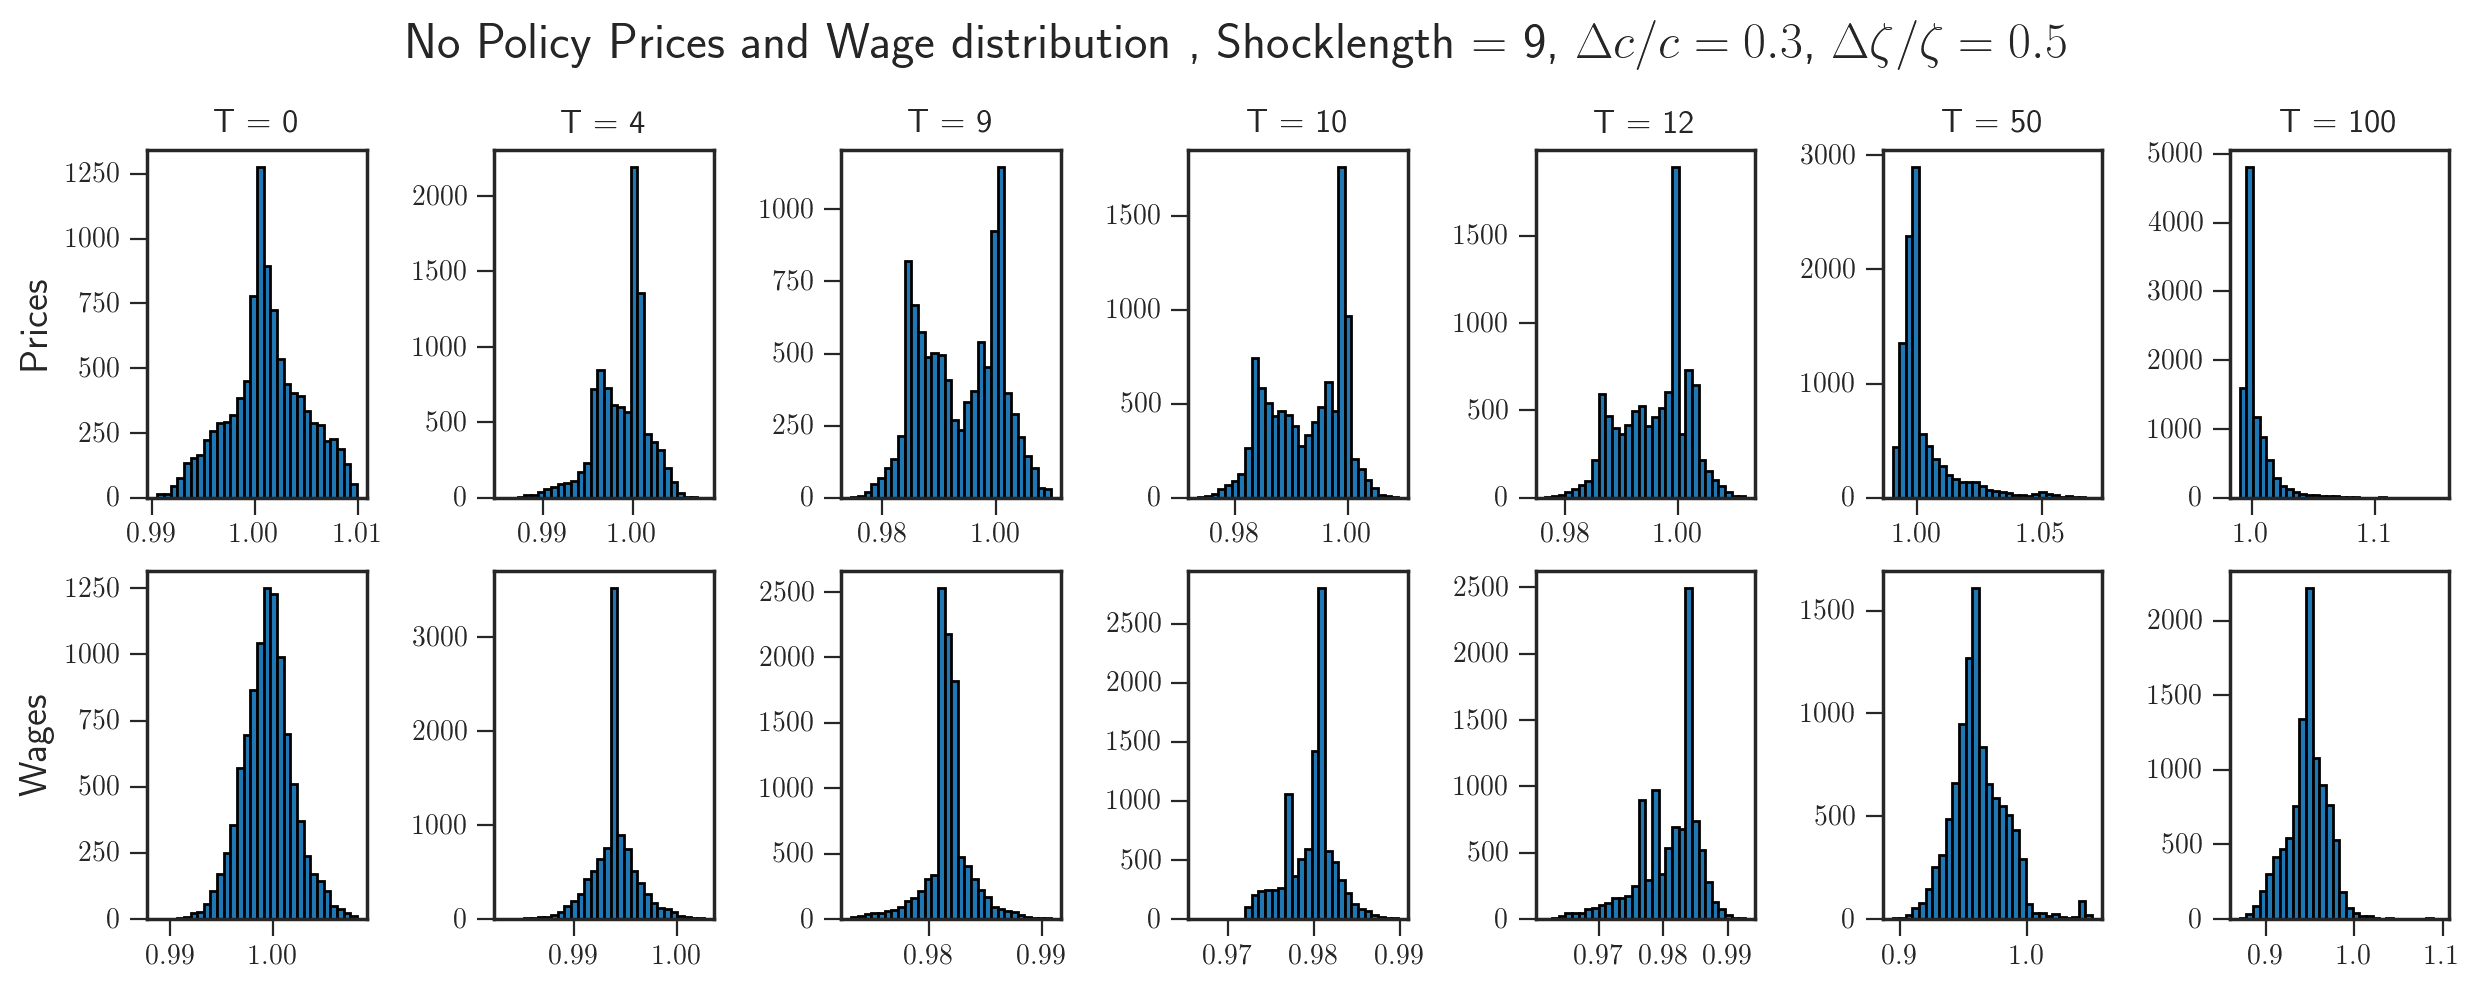

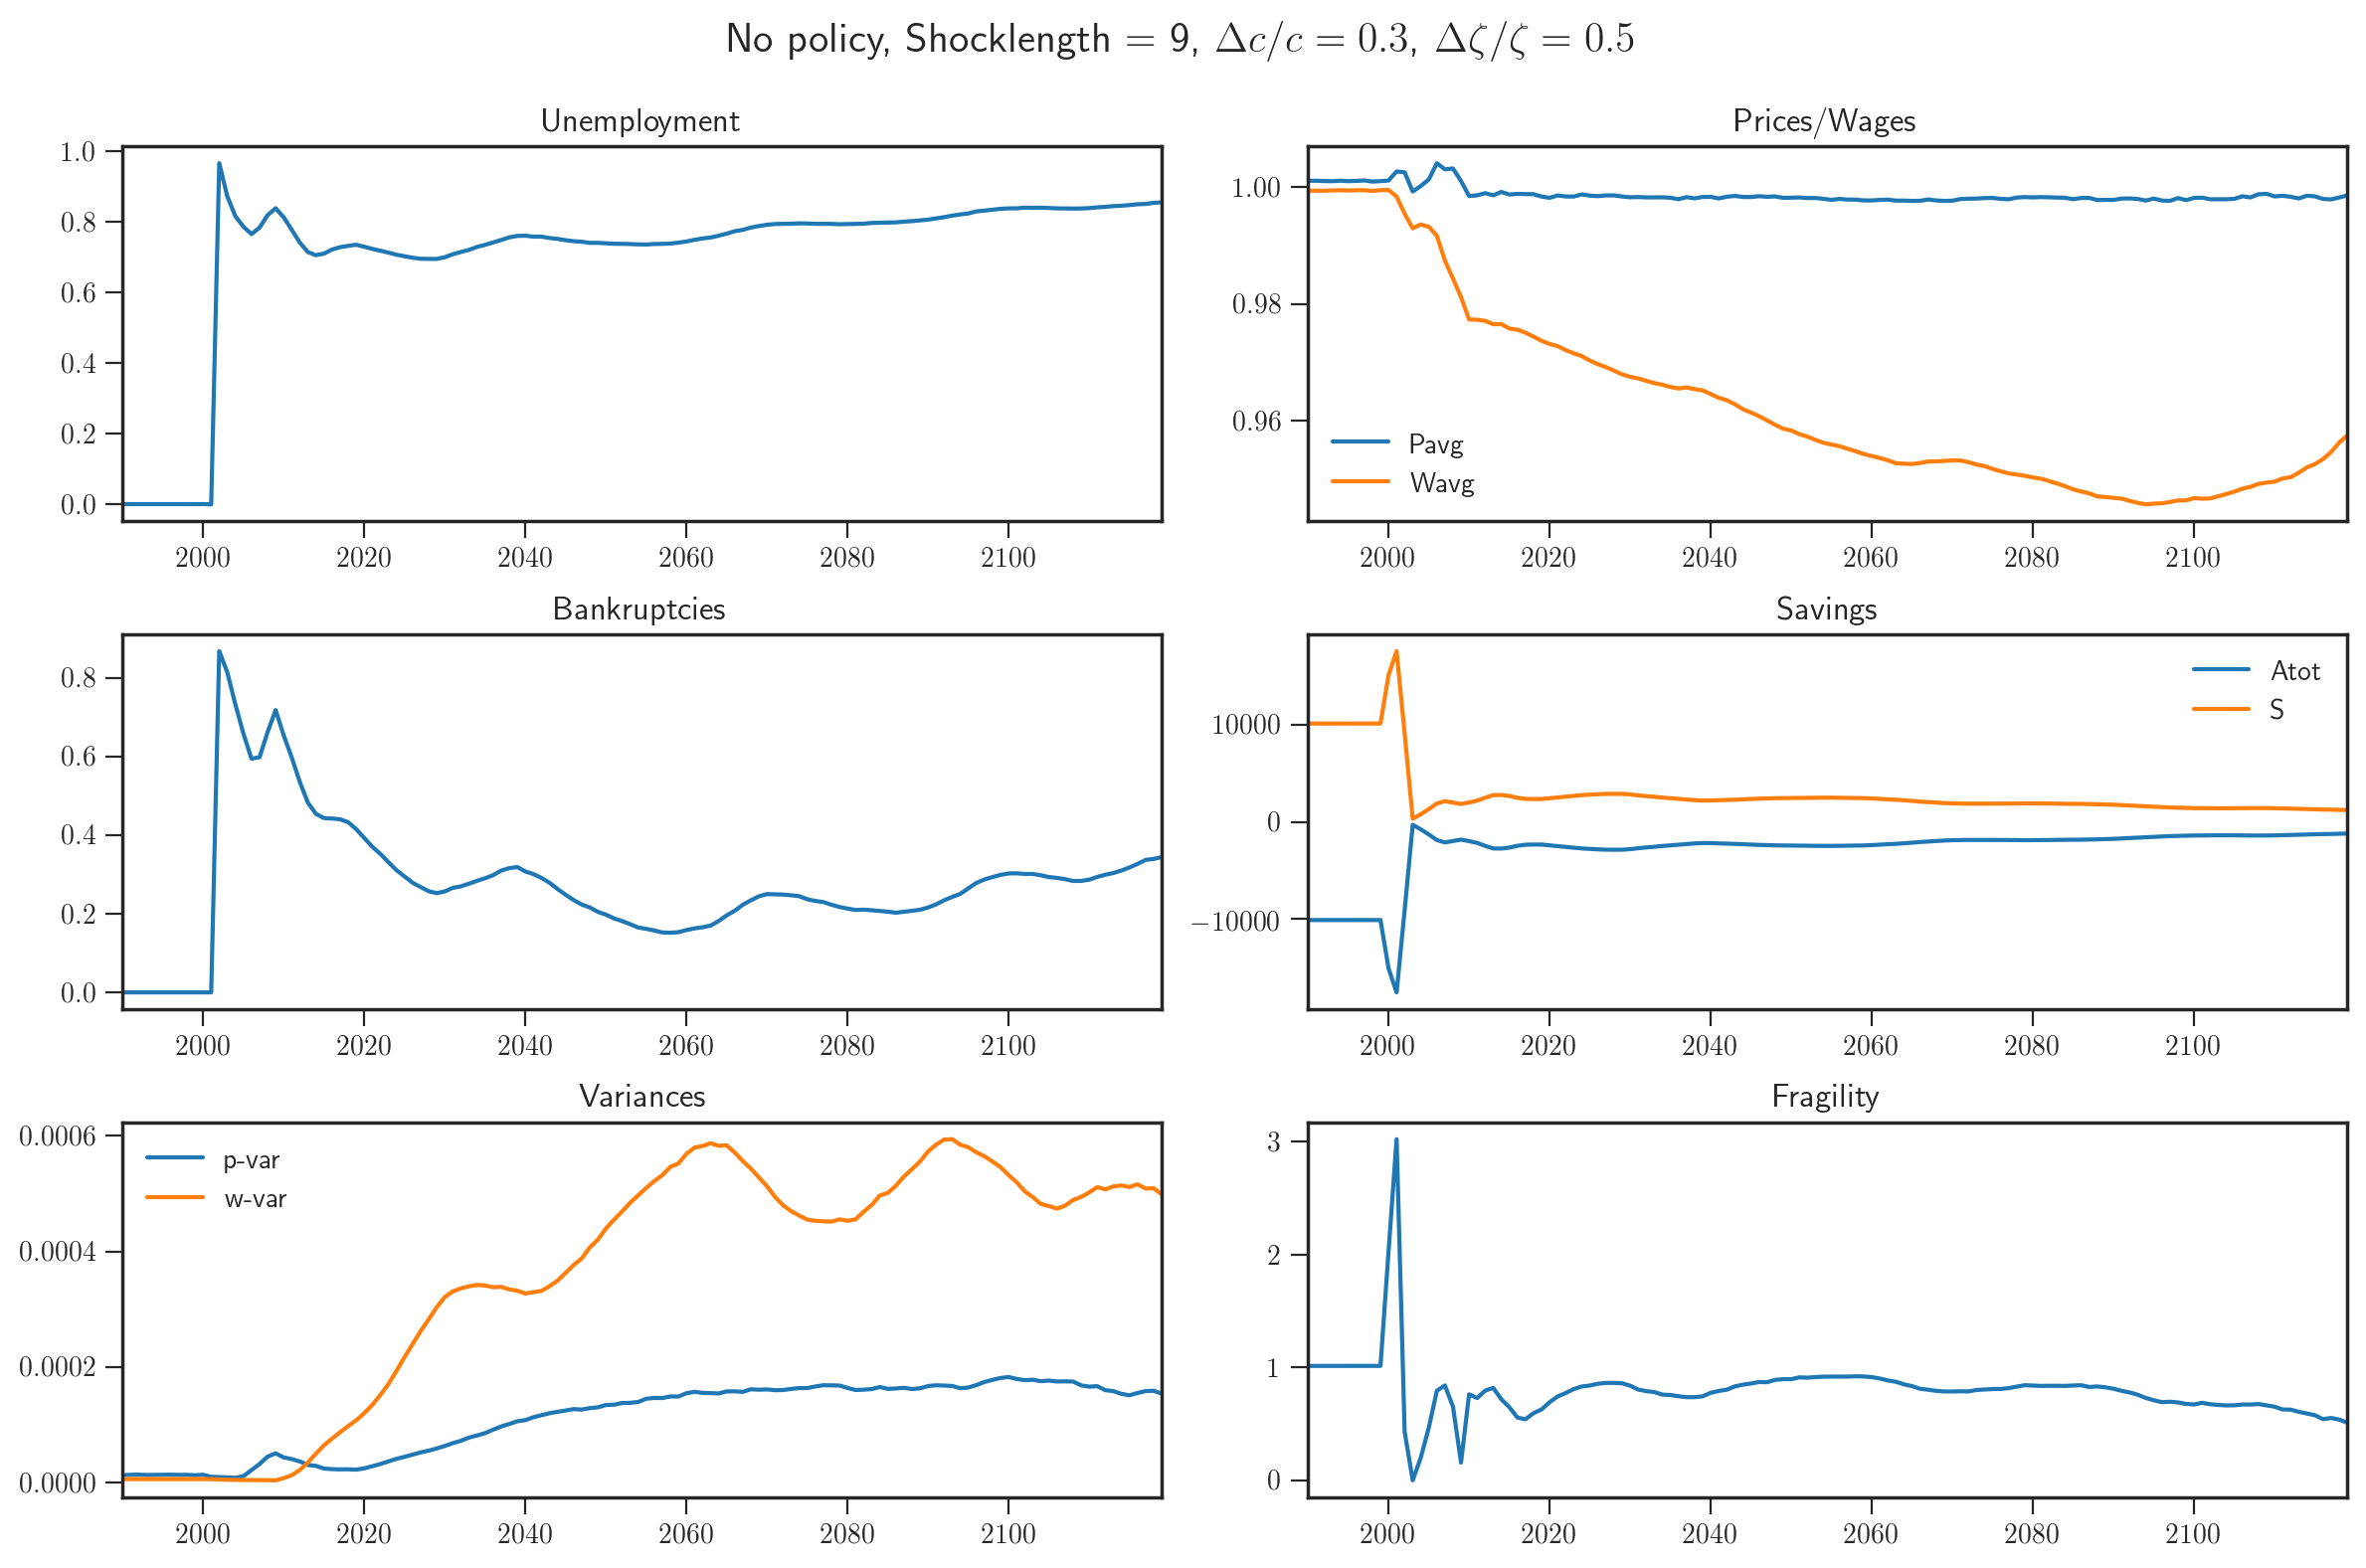

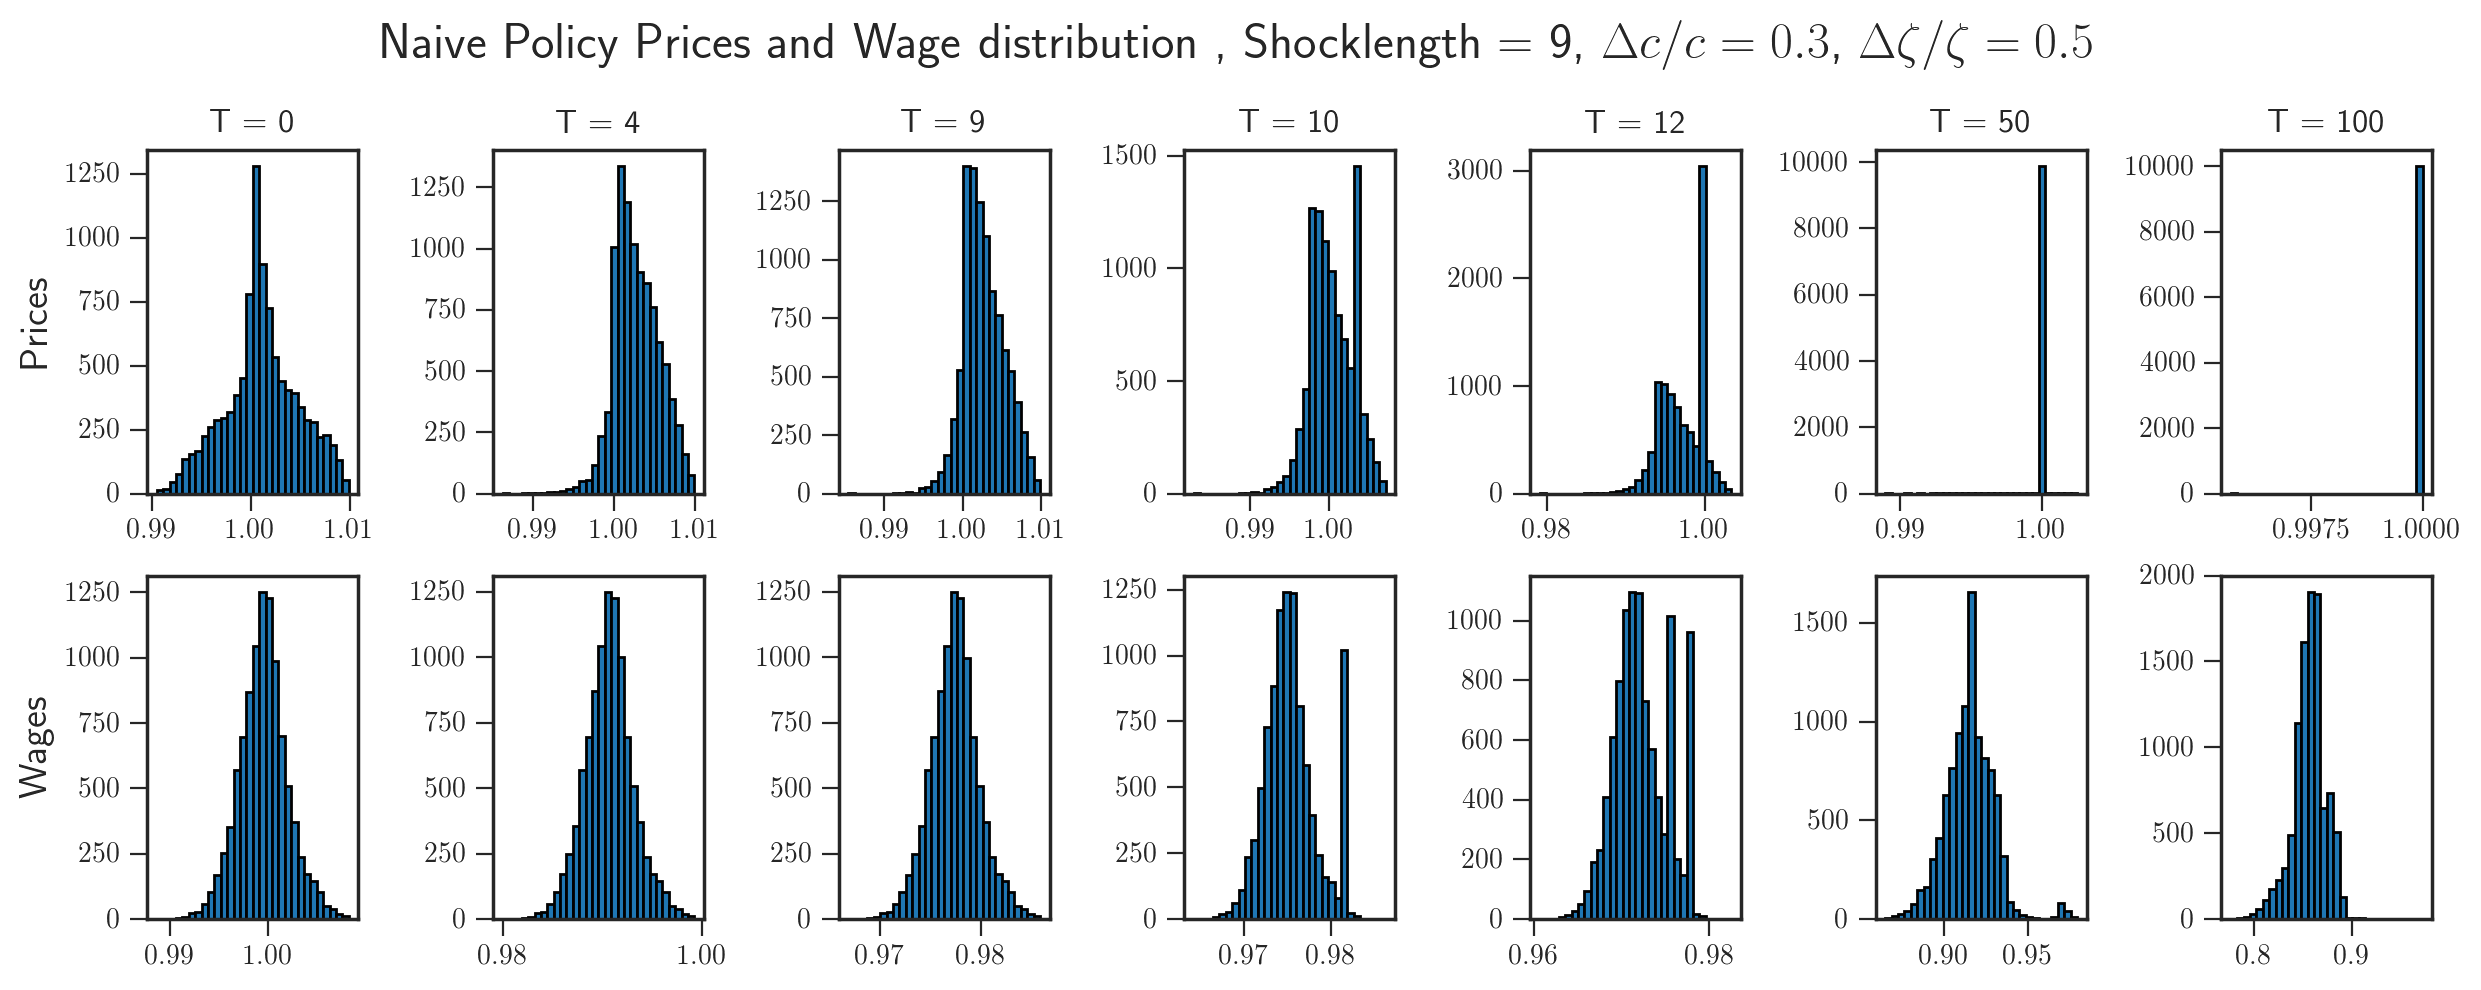

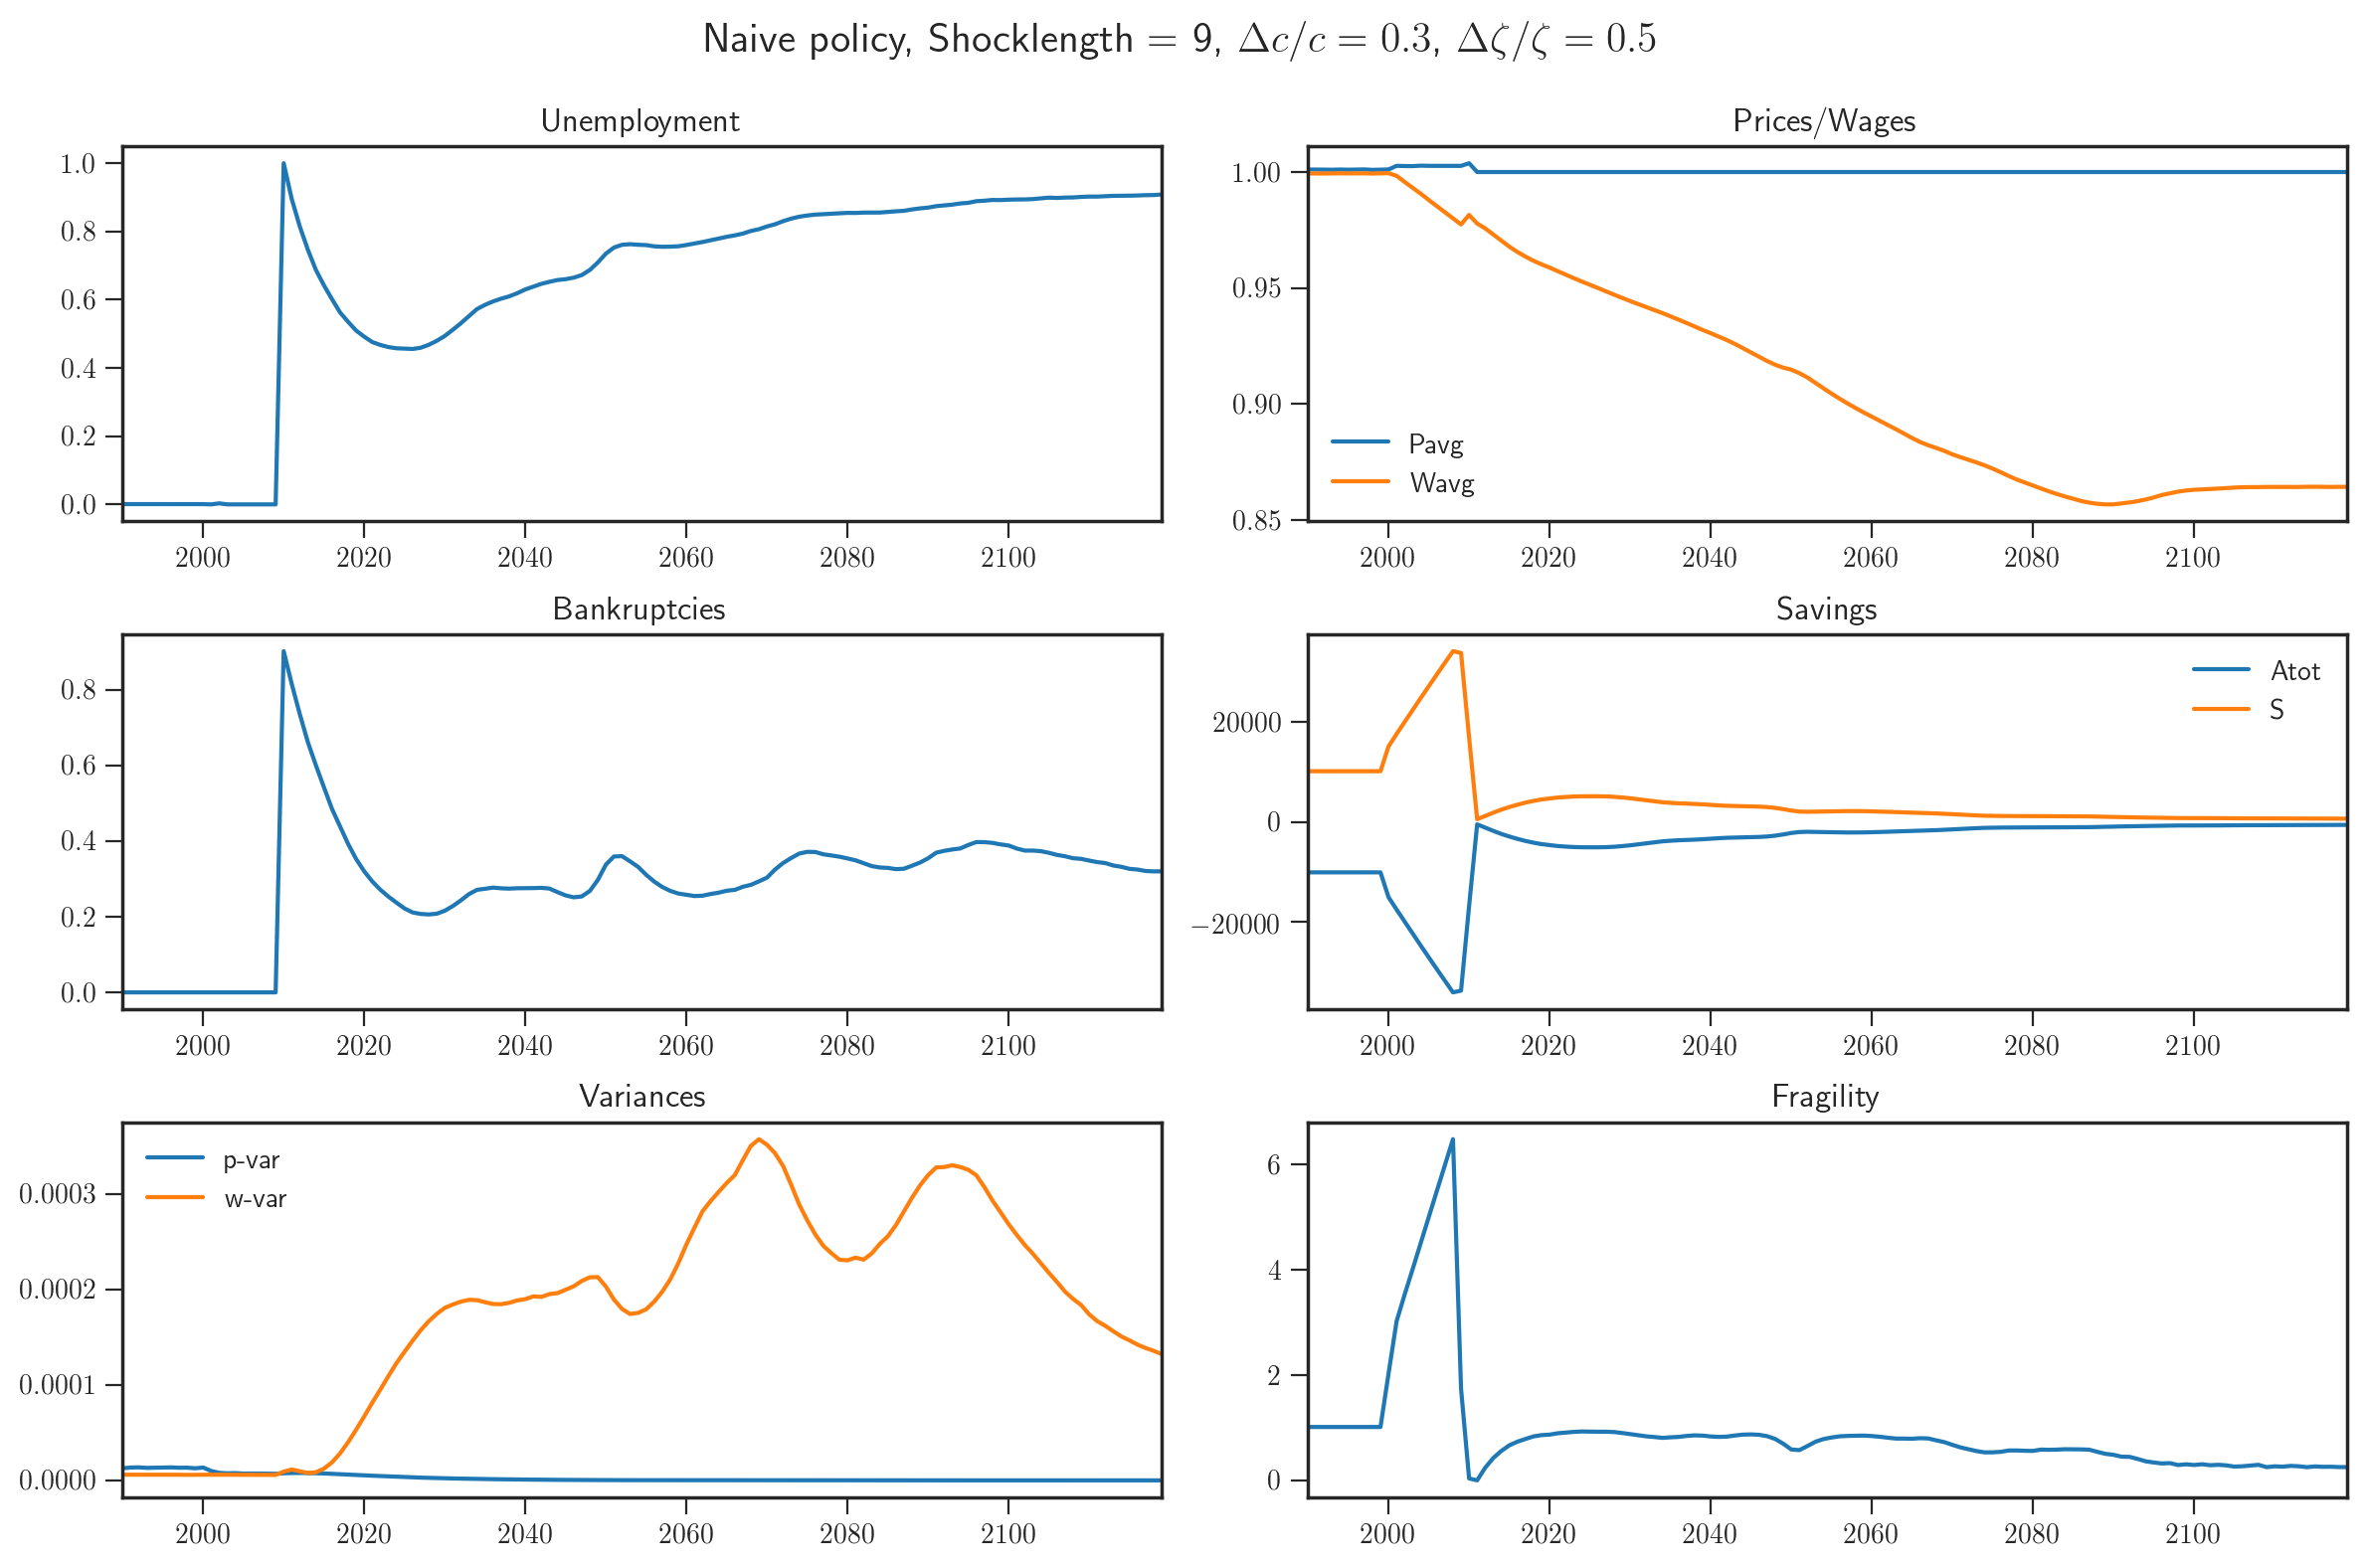

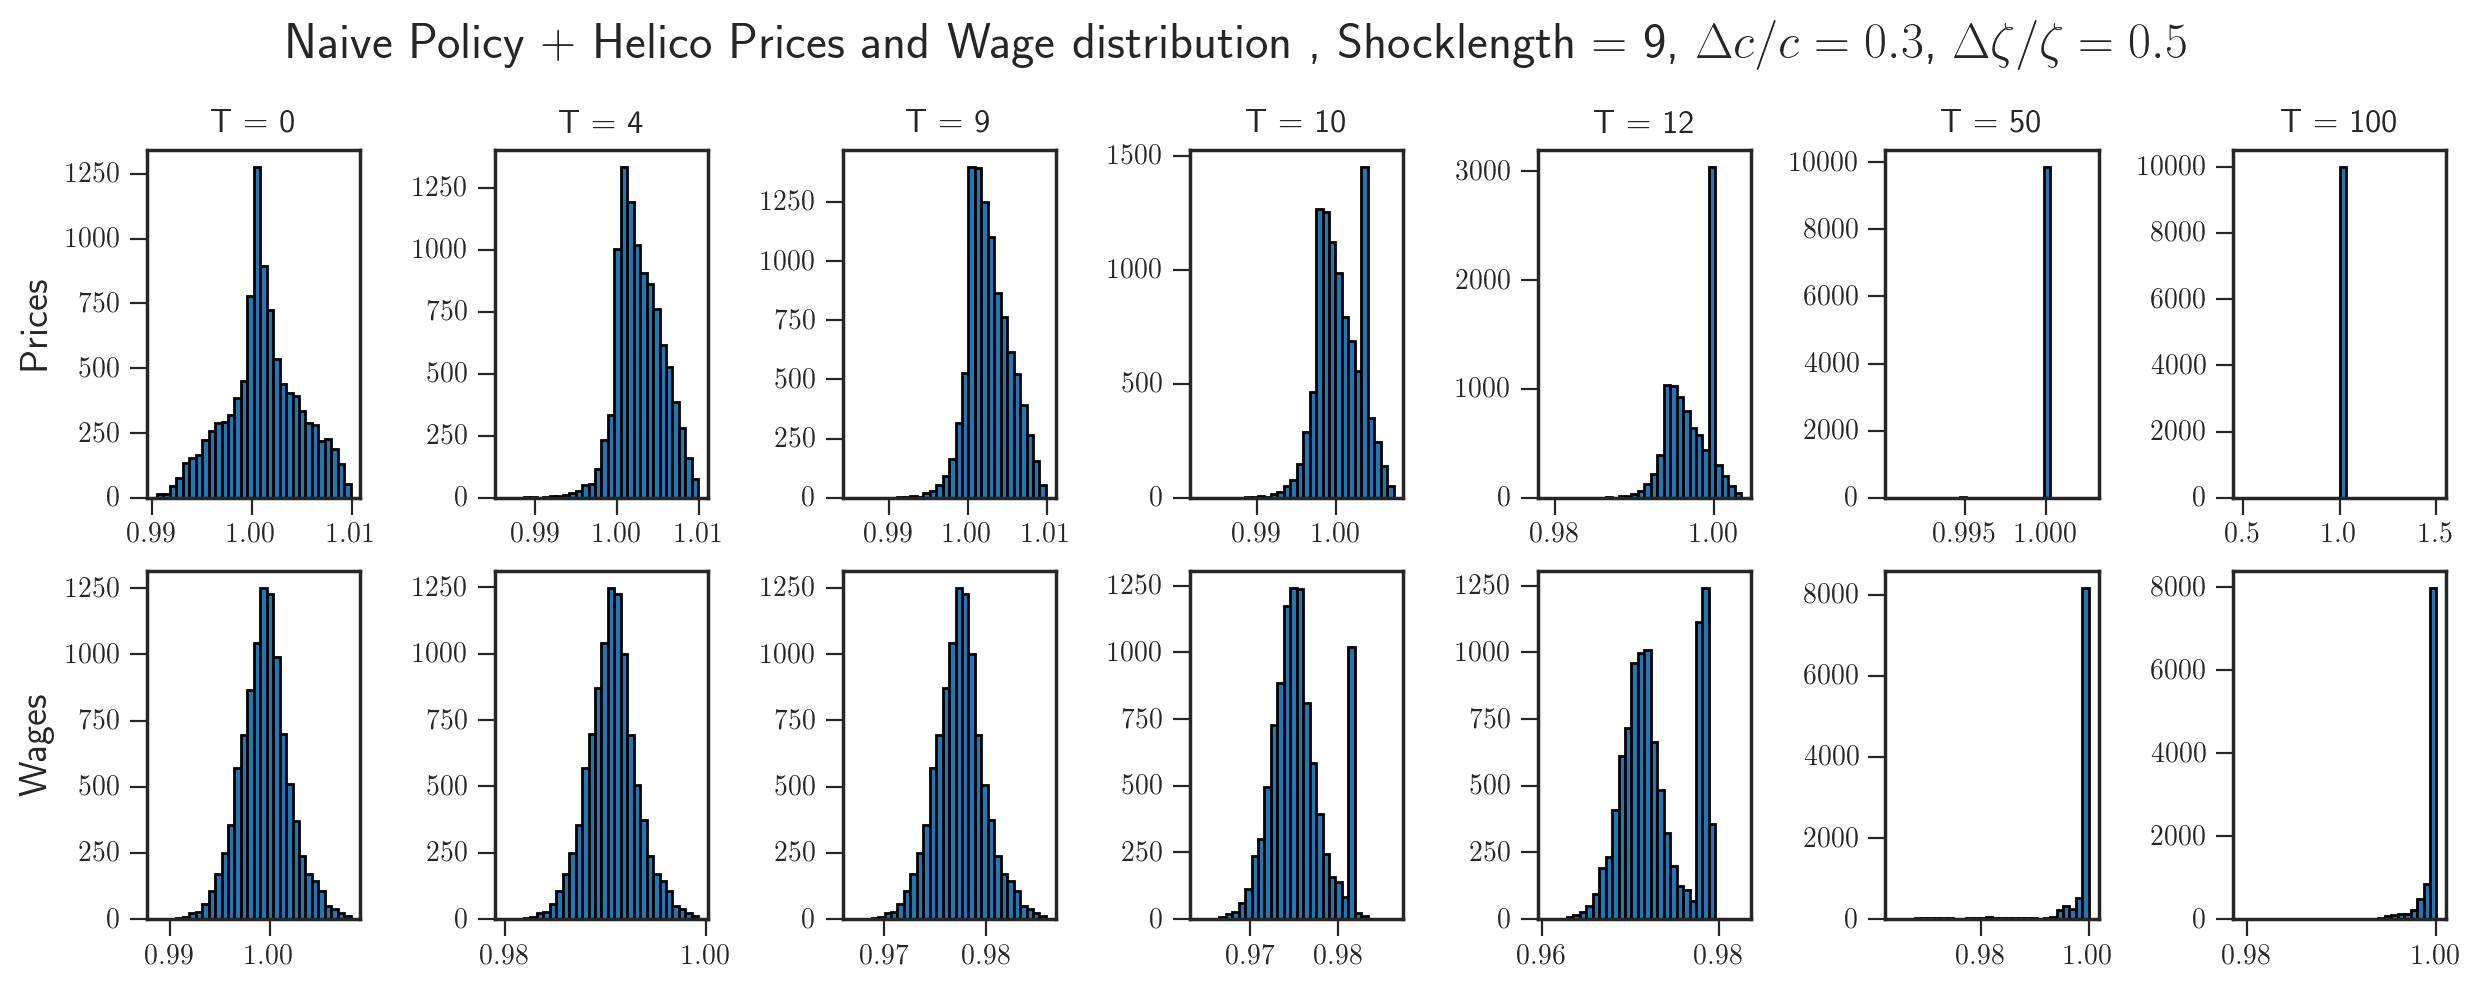

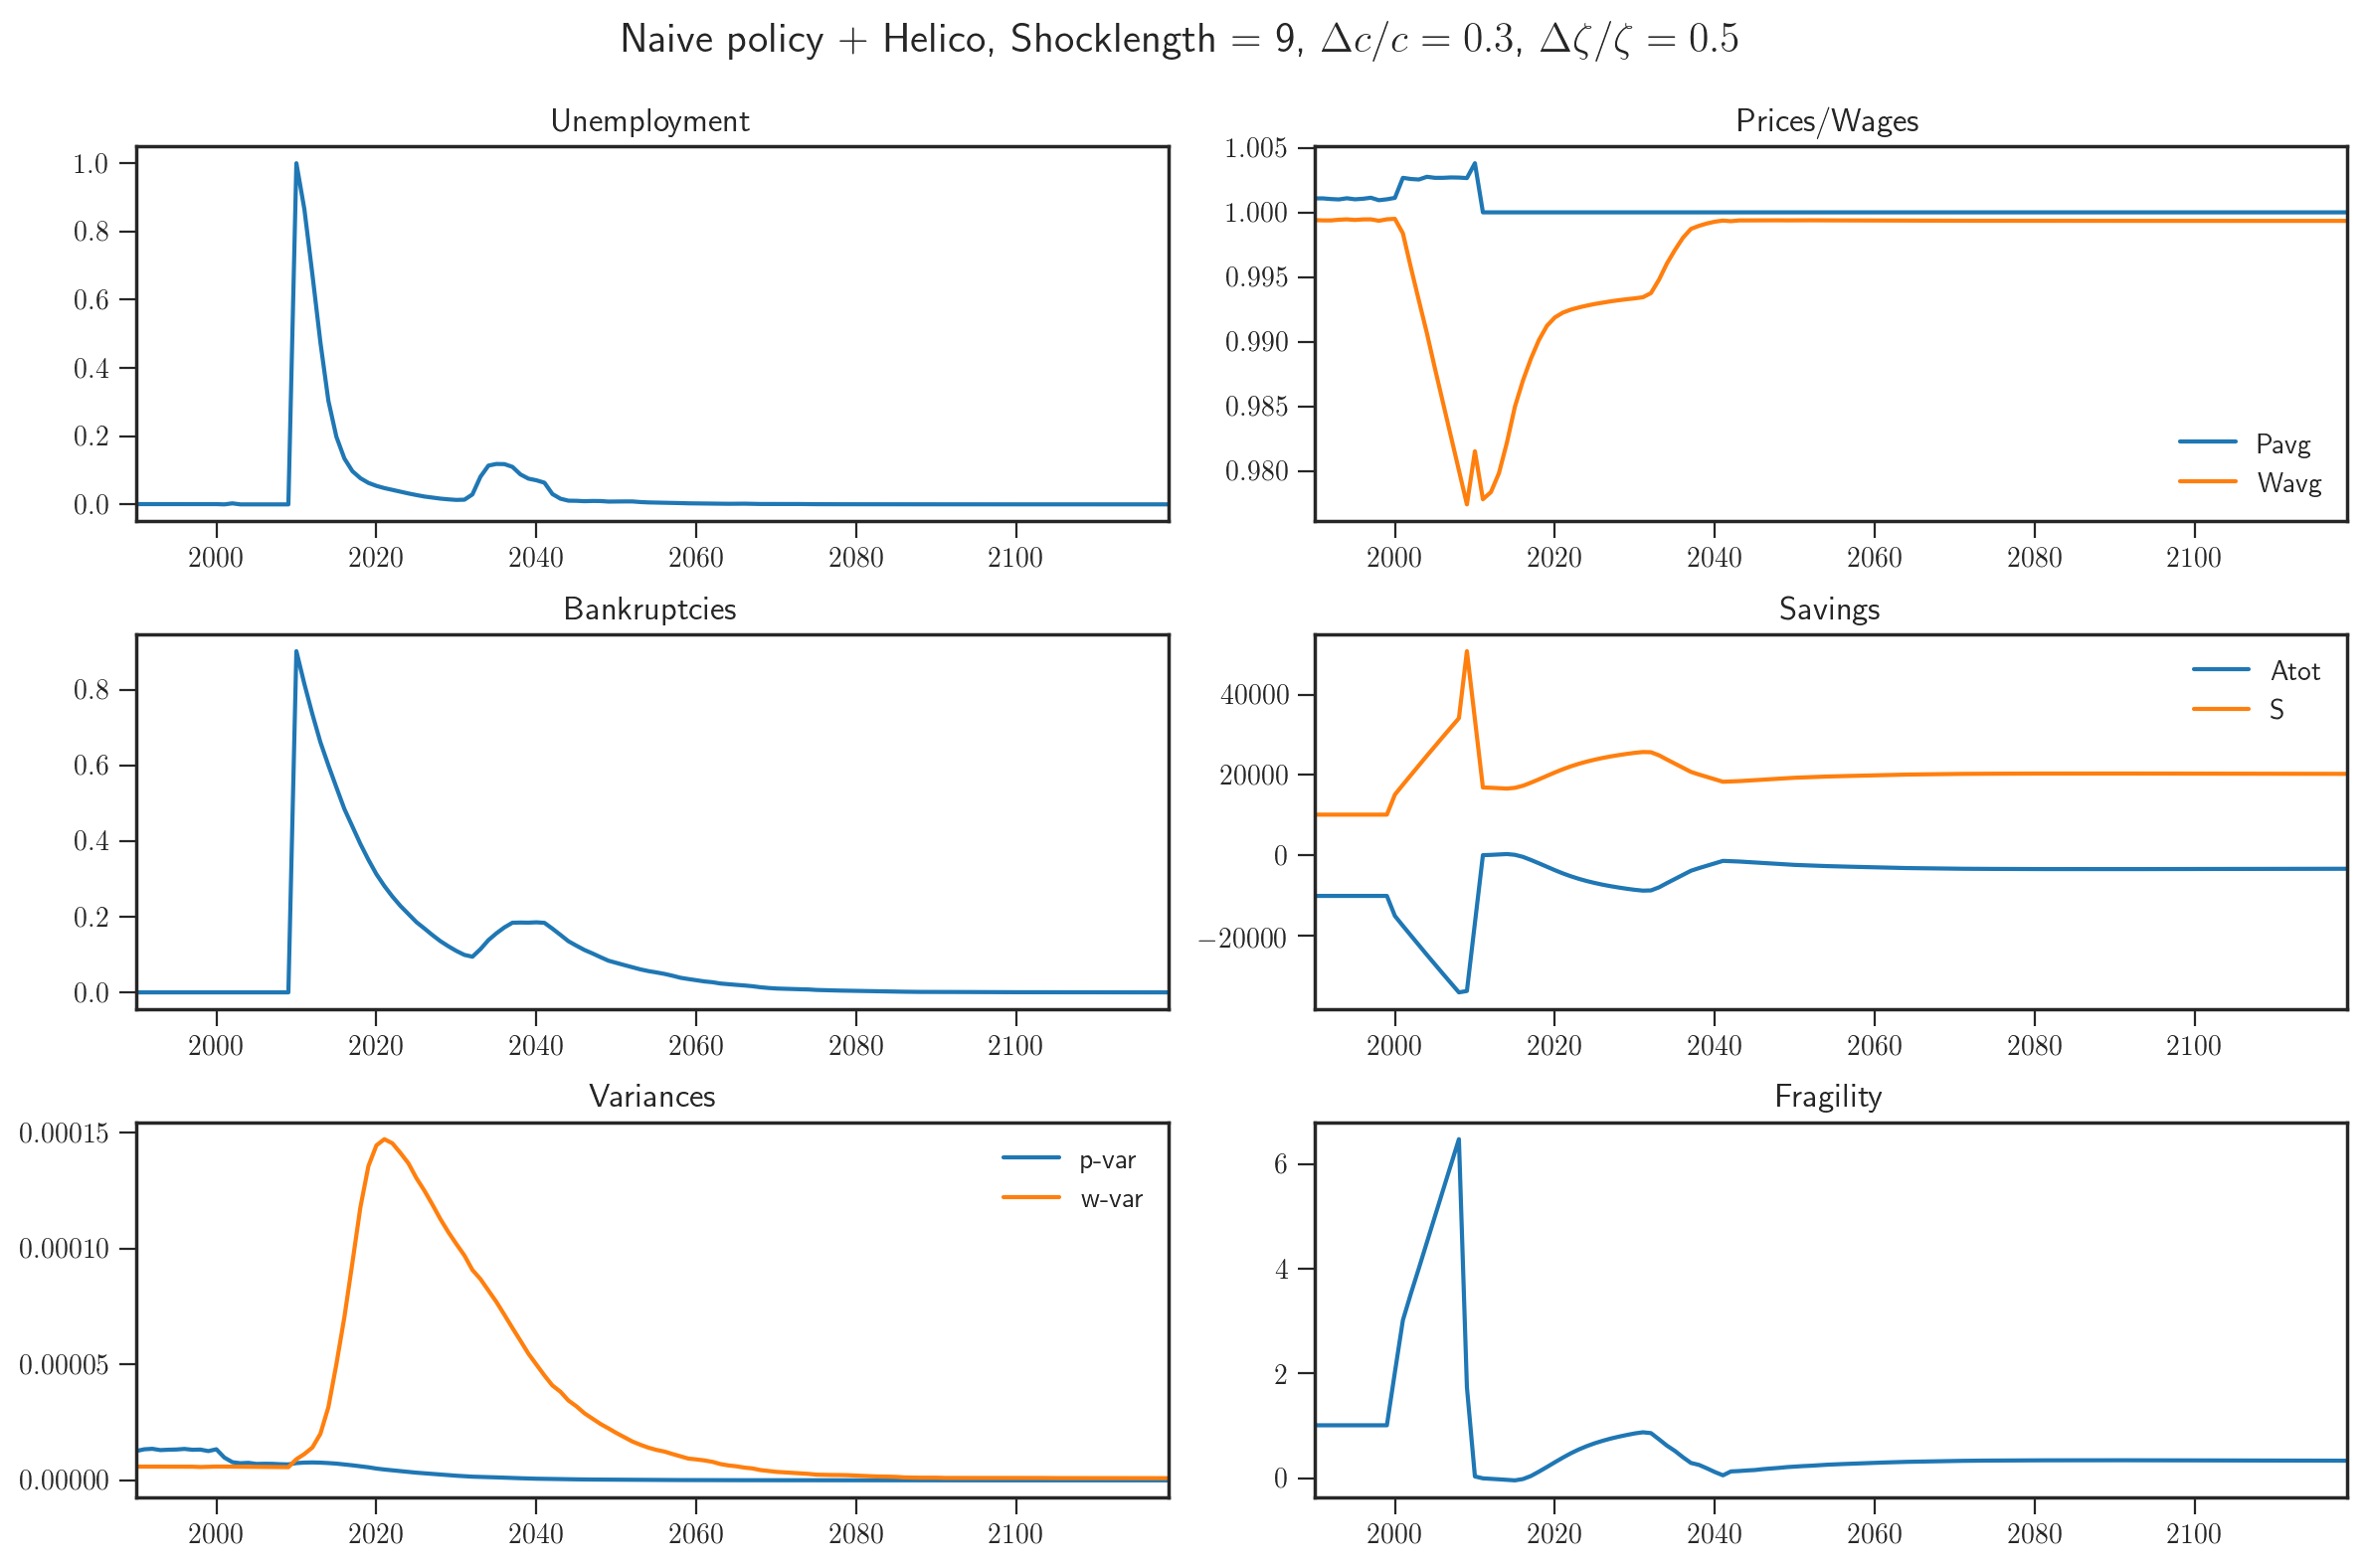

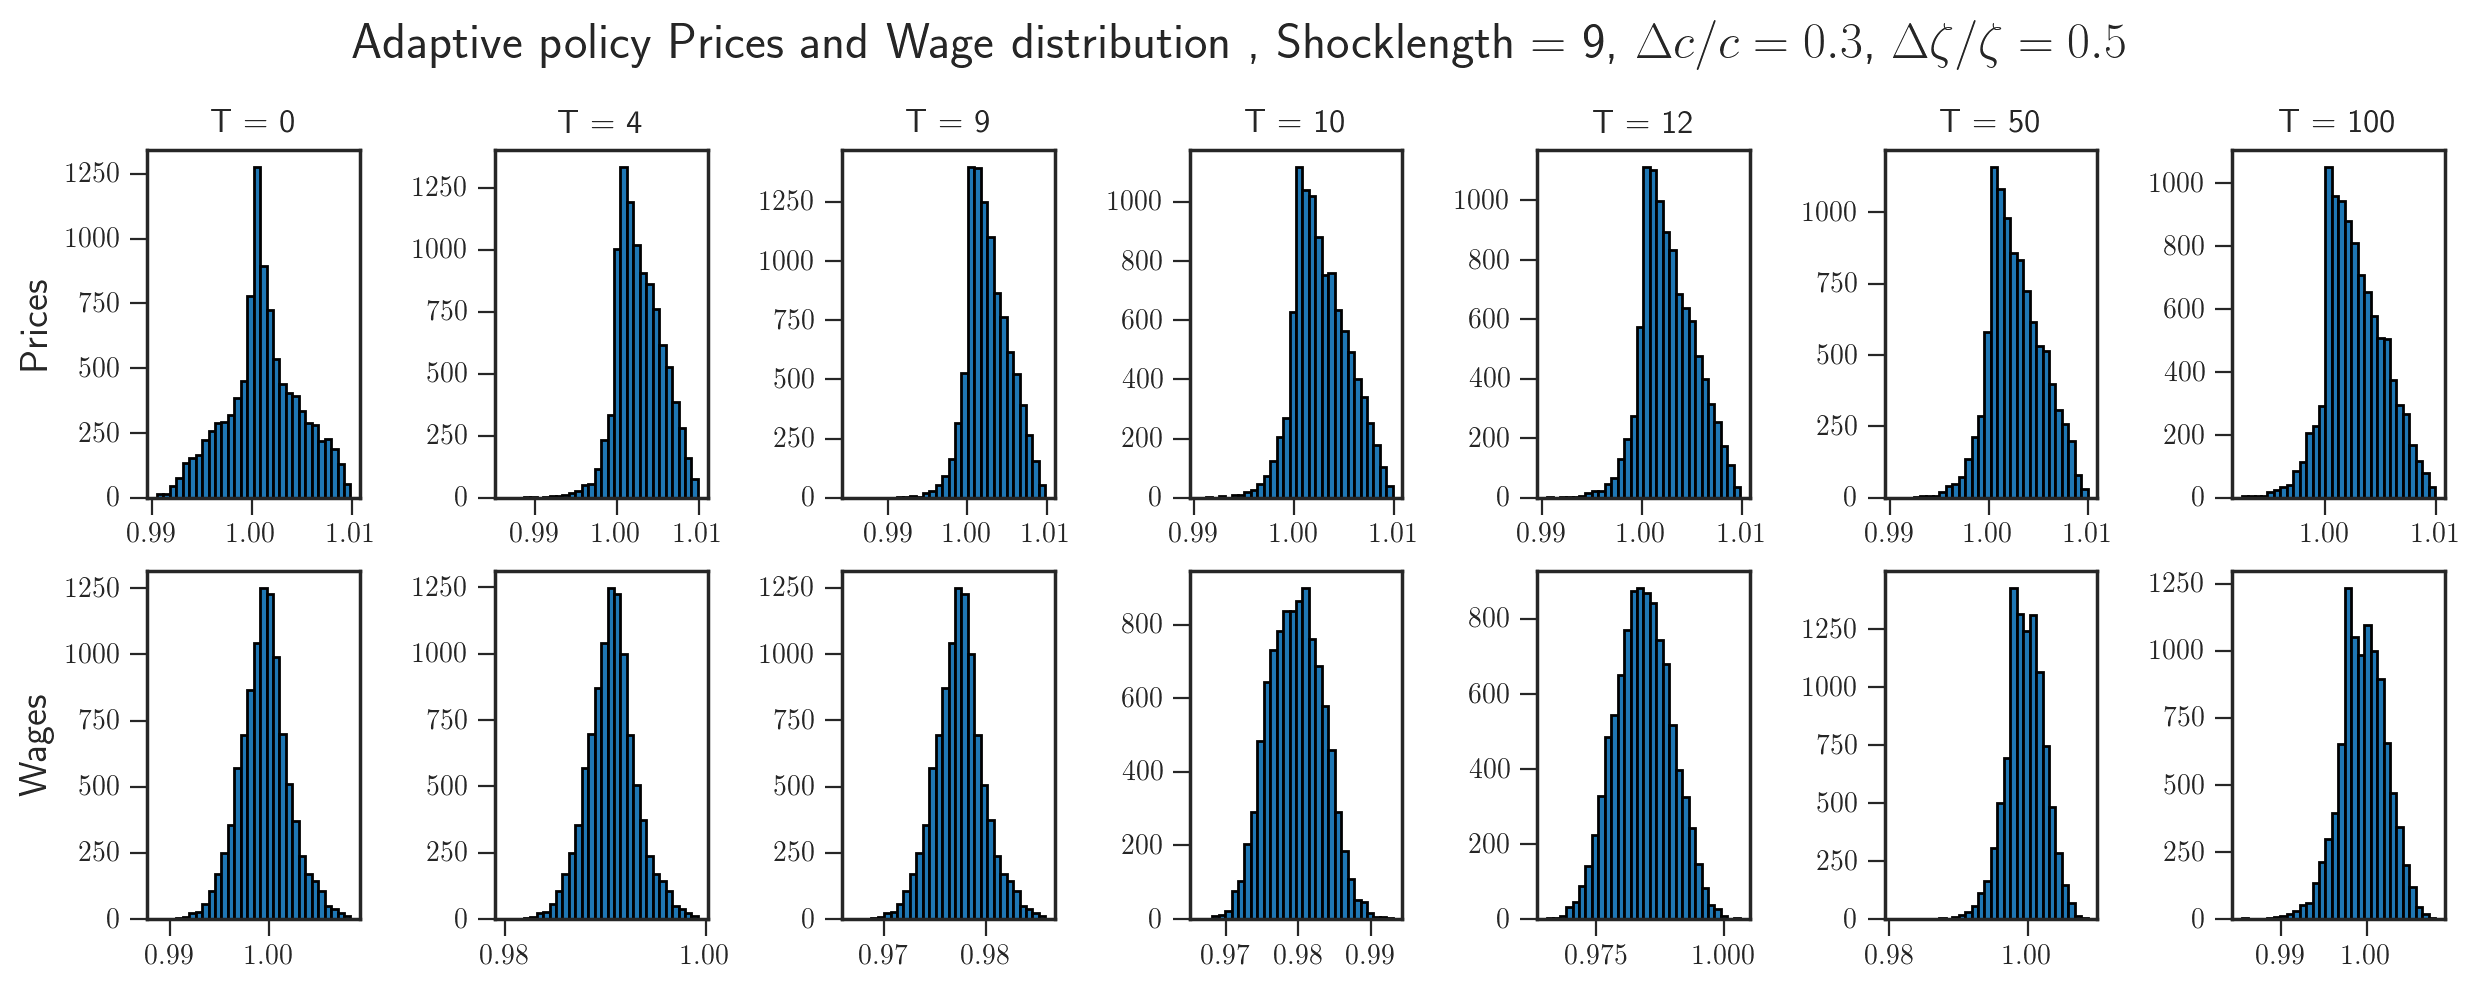

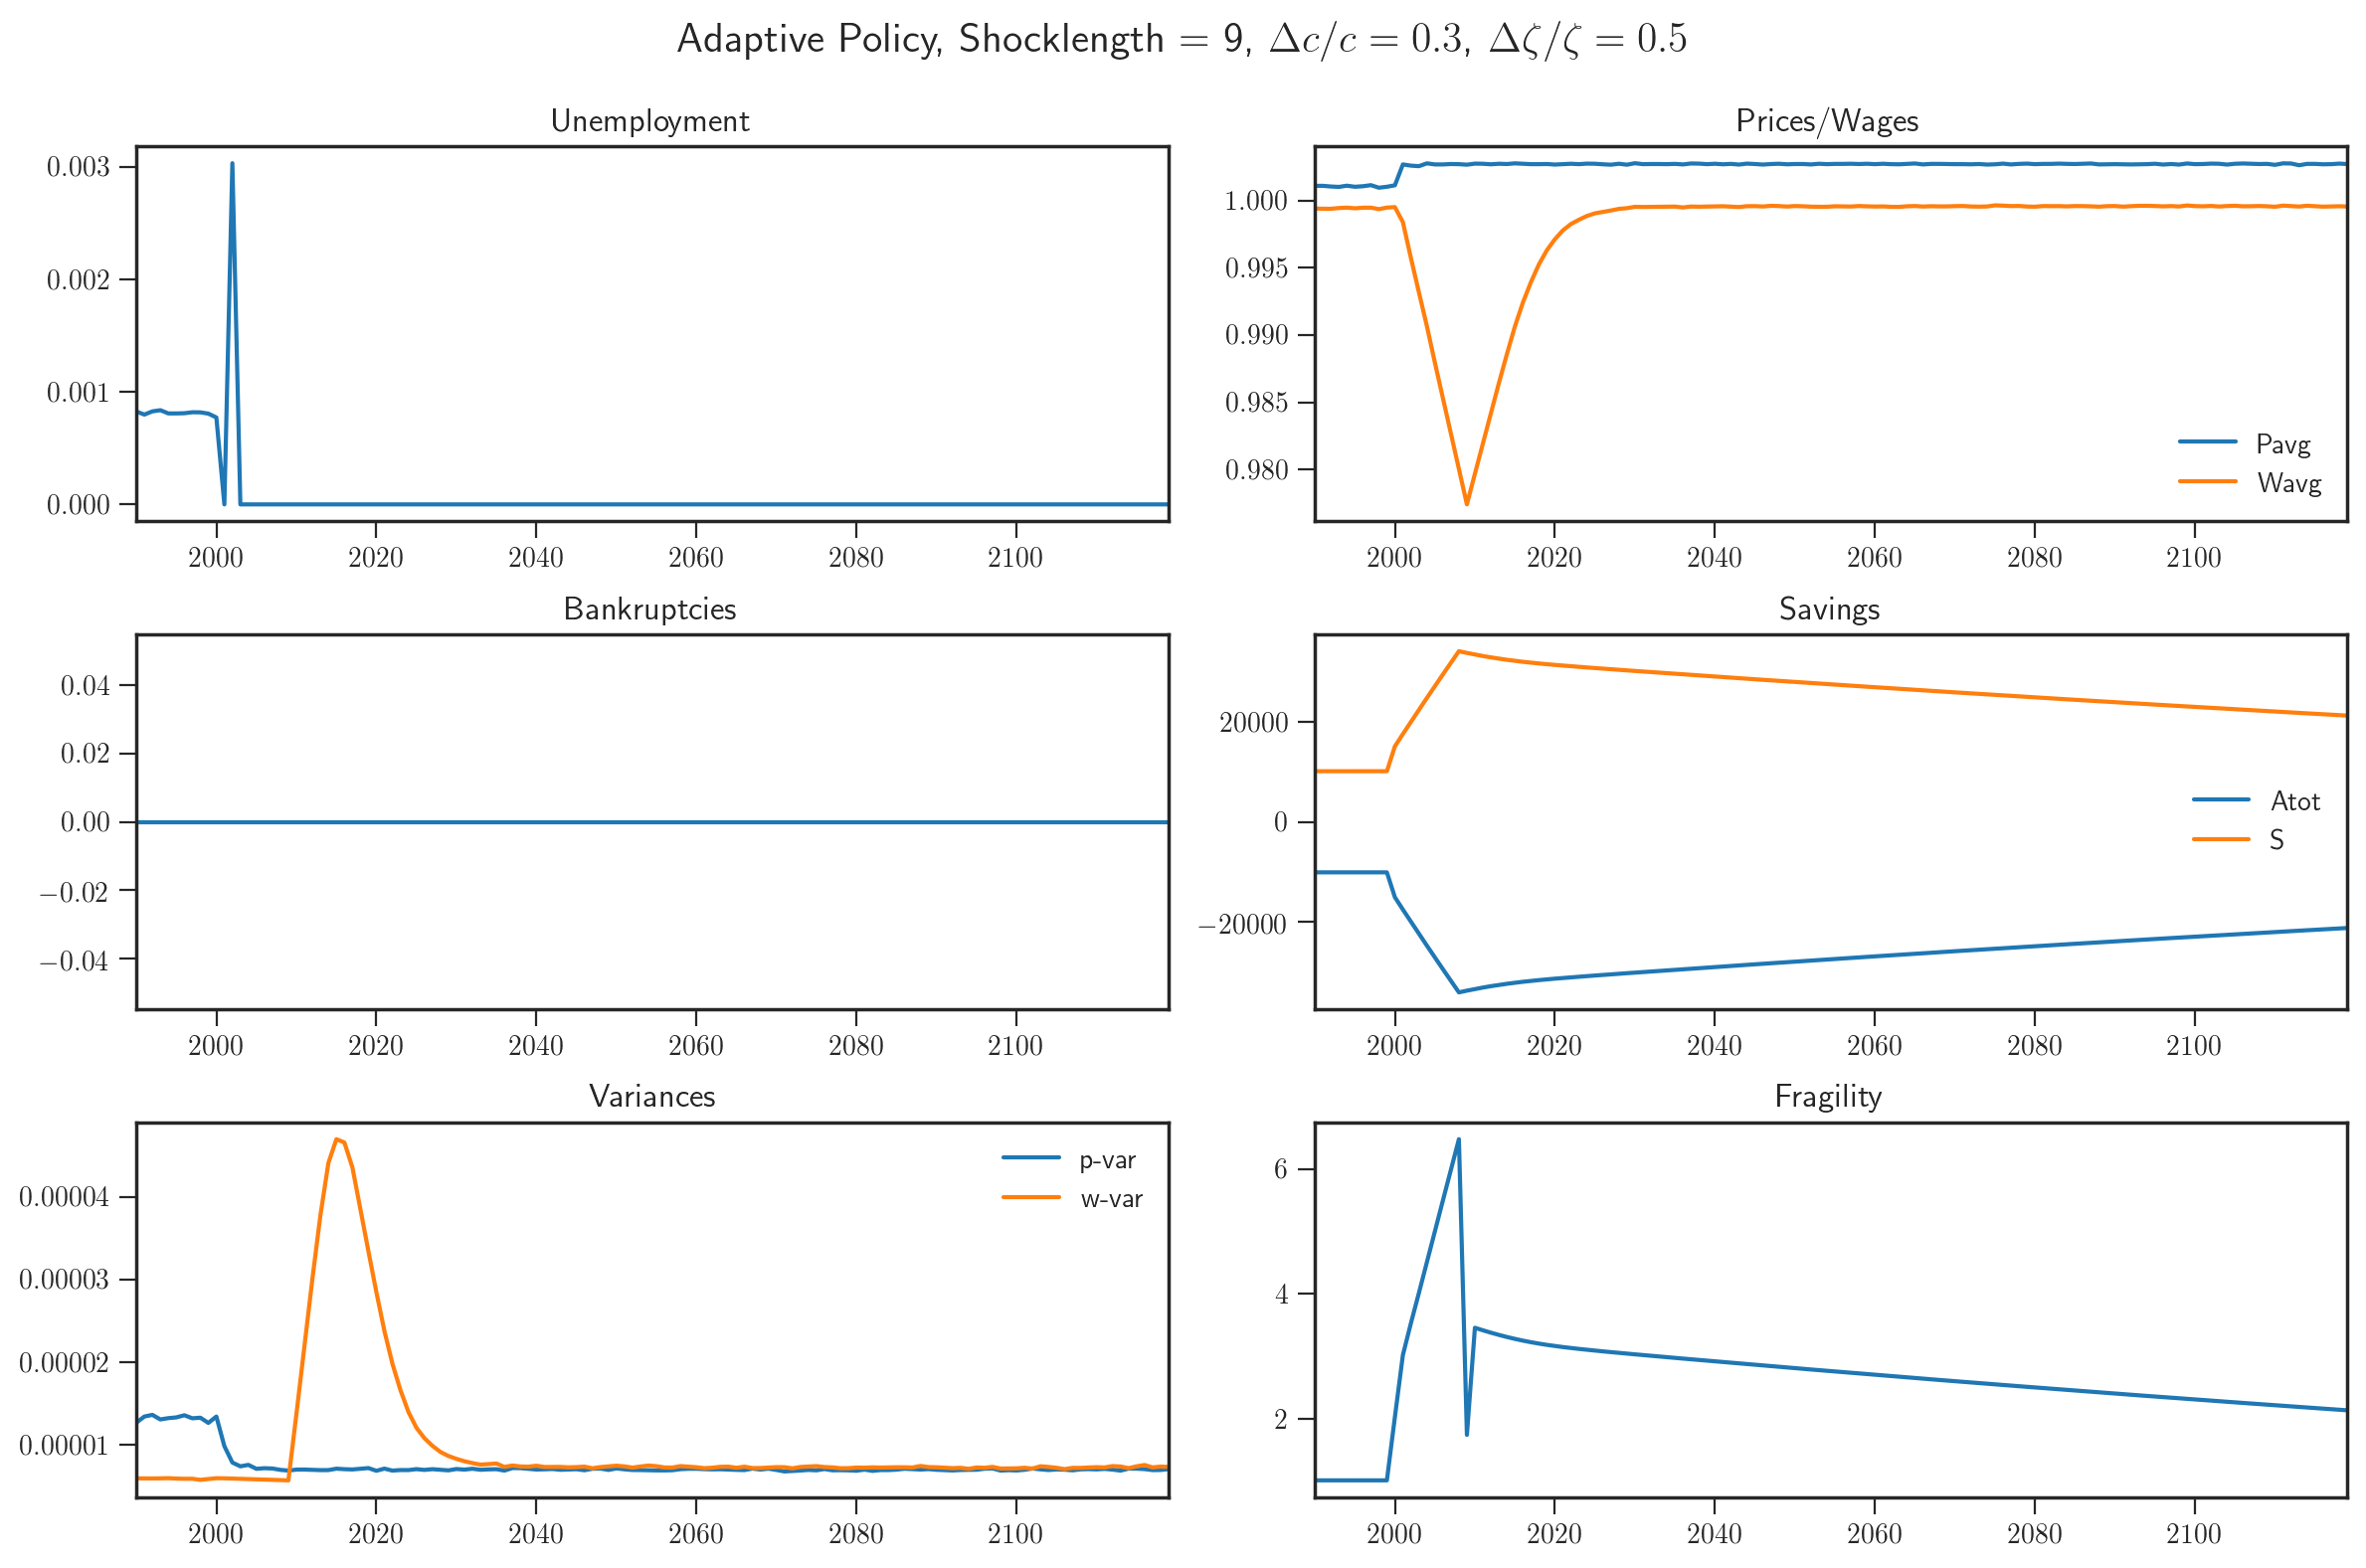

In [11]:
print("Running vanilla shock")
res_vanilla = run_and_read(list(param_dict.keys()), list(param_dict.values()))
type_crisis(res_vanilla, t_start)

prices_name = fnames[param_dict['shockflag']] +'_firms_prices.txt'
wages_name = fnames[param_dict['shockflag']] +'_firms_wages.txt'

prices_data = np.loadtxt(prices_name)
wages_data = np.loadtxt(wages_name)

plot_distributions(prices_data, wages_data, title = 'No Policy')

title = f'No policy, Shocklength = {shocklength}, $\Delta c/c = 0.3$, $\Delta \zeta / \zeta=0.5$'
t_plot(res_vanilla, fd = 1990, td = 2120, title =title)


print("With naive policy")
param_dict['shockflag'] = shockflag+3
res_naive = run_and_read(list(param_dict.keys()), list(param_dict.values()))
type_crisis(res_naive, t_start)

prices_name = fnames[param_dict['shockflag']] +'_firms_prices.txt'
wages_name = fnames[param_dict['shockflag']] +'_firms_wages.txt'

prices_data = np.loadtxt(prices_name)
wages_data = np.loadtxt(wages_name)

plot_distributions(prices_data, wages_data, title = 'Naive Policy')

title = f'Naive policy, Shocklength = {shocklength}, $\Delta c/c = 0.3$, $\Delta \zeta / \zeta=0.5$'
t_plot(res_naive, fd = 1990, td = 2120, title =title)
  
print("With Naive Policy + Helico")
param_dict['shockflag'] = shockflag+3
param_dict['helico'] = 1
res_helico = run_and_read(list(param_dict.keys()), list(param_dict.values()))
type_crisis(res_helico, t_start)

prices_name = fnames[param_dict['shockflag']] +'_firms_prices.txt'
wages_name = fnames[param_dict['shockflag']] +'_firms_wages.txt'

prices_data = np.loadtxt(prices_name)
wages_data = np.loadtxt(wages_name)

plot_distributions(prices_data, wages_data, title = 'Naive Policy + Helico')

title = f'Naive policy + Helico, Shocklength = {shocklength}, $\Delta c/c = 0.3$, $\Delta \zeta / \zeta=0.5$'
t_plot(res_helico, fd = 1990, td = 2120, title =title)

    
print("With adaptive policy")
param_dict['shockflag'] = shockflag + 3
param_dict['helico'] = 0
param_dict['gpolicy'] = 1
res_adapt = run_and_read(list(param_dict.keys()), list(param_dict.values()))
type_crisis(res_adapt, t_start)

prices_name = fnames[param_dict['shockflag']] +'_firms_prices.txt'
wages_name = fnames[param_dict['shockflag']] +'_firms_wages.txt'

prices_data = np.loadtxt(prices_name)
wages_data = np.loadtxt(wages_name)

plot_distributions(prices_data, wages_data, title = 'Adaptive policy')

title = f'Adaptive Policy, Shocklength = {shocklength}, $\Delta c/c = 0.3$, $\Delta \zeta / \zeta=0.5$'
t_plot(res_adapt, fd = 1990, td = 2120, title =title)
